# Fetch Data

# K-mean Clustering

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
A = pd.read_csv("C:/Users/Anuj.kumar/Desktop/HR-Employee-Attrition-Table 1.csv")

In [3]:
A.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Check missing data

In [4]:
A.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We can see data need not to replace any value.

In [5]:
A.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
B=A[["MonthlyIncome", "HourlyRate"]]

In [7]:
B.head()

,MonthlyIncome,HourlyRate
0,5993,94
1,5130,61
2,2090,92
3,2909,56
4,3468,40


# WCSS

In [8]:
from sklearn.cluster import KMeans
K=list(range(1,15,1))
wcss=[]
for i in range(1,15,1):
        km=KMeans(n_clusters=i)
        model=km.fit(B)
        wcss.append(model.inertia_)    

In [9]:
wcss

[32560782154.645557,
 8256100453.993704,
 3616103536.500104,
 1804620103.1520255,
 1153833313.3352604,
 745376159.7439939,
 574271063.1319926,
 423191985.4277863,
 325181930.75412446,
 268367492.26317278,
 222752908.52684626,
 193826898.93585268,
 169704931.23575616,
 149869560.41950005]

In [10]:
list(zip(K,wcss))

[(1, 32560782154.645557),
 (2, 8256100453.993704),
 (3, 3616103536.500104),
 (4, 1804620103.1520255),
 (5, 1153833313.3352604),
 (6, 745376159.7439939),
 (7, 574271063.1319926),
 (8, 423191985.4277863),
 (9, 325181930.75412446),
 (10, 268367492.26317278),
 (11, 222752908.52684626),
 (12, 193826898.93585268),
 (13, 169704931.23575616),
 (14, 149869560.41950005)]

# Elbow Curve

([<matplotlib.axis.XTick at 0x2beecded8b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

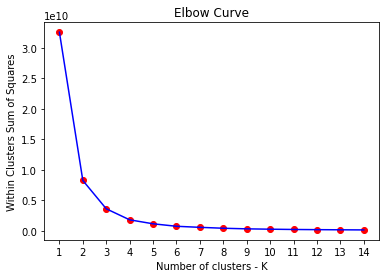

In [11]:
import matplotlib.pyplot as plt
plt.scatter(K,wcss,c="red")
plt.plot(K,wcss,c="blue")
plt.xlabel("Number of clusters - K")
plt.ylabel("Within Clusters Sum of Squares")
plt.title("Elbow Curve")
plt.xticks(range(1,15,1))

In [12]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
model=km.fit(B)

In [13]:
B[["clusters"]]=model.labels_

In [14]:
B.head()

,MonthlyIncome,HourlyRate,clusters
0,5993,94,3
1,5130,61,3
2,2090,92,0
3,2909,56,0
4,3468,40,0


In [15]:
import matplotlib.pyplot as plt

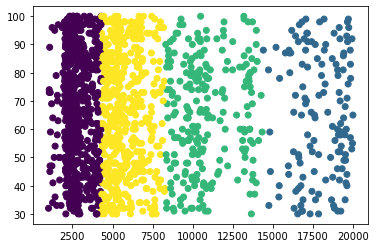

In [16]:
plt.scatter(B["MonthlyIncome"],B["HourlyRate"],c=B["clusters"])

In [17]:
B[["JobRole"]]=A.JobRole

In [18]:
B.head(20)

,MonthlyIncome,HourlyRate,clusters,JobRole
0,5993,94,3,Sales Executive
1,5130,61,3,Research Scientist
2,2090,92,0,Laboratory Technician
3,2909,56,0,Research Scientist
4,3468,40,0,Laboratory Technician
5,3068,79,0,Laboratory Technician
6,2670,81,0,Laboratory Technician
7,2693,67,0,Laboratory Technician
8,9526,44,2,Manufacturing Director
9,5237,94,3,Healthcare Representative


In [19]:
a = input("Enter any JobRole: ")

clusters = B[B.JobRole == a].clusters.values[0]

print("JobRole that are similar to your JobRole are: ")

print(B[B.clusters == clusters].JobRole.values)

Enter any JobRole: Manager
JobRole that are similar to your JobRole are: 
['Manager' 'Manager' 'Manager' 'Research Director' 'Research Director'
 'Manager' 'Manager' 'Research Director' 'Manager' 'Manager'
 'Research Director' 'Manager' 'Manager' 'Manager' 'Research Director'
 'Manager' 'Manager' 'Manager' 'Manager' 'Manager' 'Manager' 'Manager'
 'Research Director' 'Manager' 'Manager' 'Research Director'
 'Research Director' 'Research Director' 'Manager' 'Manager' 'Manager'
 'Research Director' 'Research Director' 'Manager' 'Research Director'
 'Manager' 'Manager' 'Manager' 'Manager' 'Manager' 'Research Director'
 'Manager' 'Research Director' 'Manager' 'Research Director' 'Manager'
 'Research Director' 'Manager' 'Manager' 'Research Director' 'Manager'
 'Manager' 'Manager' 'Manager' 'Manager' 'Research Director' 'Manager'
 'Research Director' 'Research Director' 'Manager' 'Manager' 'Manager'
 'Manager' 'Manager' 'Research Director' 'Research Director' 'Manager'
 'Research Director' 'M

# Hierarichal Clustering

In [20]:
C=A[['PercentSalaryHike' , 'MonthlyIncome', "JobSatisfaction", "DistanceFromHome"]]

In [21]:
from sklearn.cluster import AgglomerativeClustering
agc=AgglomerativeClustering(n_clusters=4)
model=agc.fit(C)

In [22]:
model.labels_

array([1, 1, 3, ..., 1, 1, 1], dtype=int64)

In [23]:
A["cluster"]=model.labels_

In [24]:
A.head(20)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cluster
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,1
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,3
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,3
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,3
5,0,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6,3
6,0,59,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0,3
7,0,30,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0,3
8,0,38,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8,0
9,0,36,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7,1


In [25]:
A[A.cluster==2][["JobRole"]]

,JobRole
18,Manager
25,Manager
29,Manager
45,Research Director
62,Research Director
65,Manager
105,Manager
106,Research Director
112,Manager
119,Manager


In [26]:
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import matplotlib.pyplot as plt

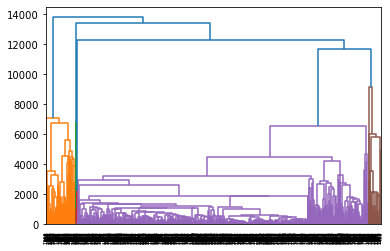

In [27]:
D = pd.DataFrame(distance_matrix(C.values,C.values))
dendrogram(linkage(D))
plt.show()